# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv',nrows=50000)
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


## 2. Preprocessing

### 2.1  project_subject_categories

In [4]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [5]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports


In [6]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

In [7]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))

### 2.2 project_subject_subcategories¶

In [8]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [9]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports


In [10]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

In [11]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


### 2.3 Project Essay

In [12]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [13]:
# printing some random essays.
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [14]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [15]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations. \r\n\r\nThe materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills. \r\nThey also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing

In [16]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays, cognitive delays, gross/fine motor delays, to autism. They are eager beavers and always strive to work their hardest working past their limitations.     The materials we have are the ones I seek out for my students. I teach in a Title I school where most of the students receive free or reduced price lunch.  Despite their disabilities and limitations, my students love coming to school and come eager to learn and explore.Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting? This is how my kids feel all the time. The want to be able to move as they learn or so they say.Wobble chairs are the answer and I love then because they develop their core, which enhances gross motor and in Turn fine motor skills.   They also want to learn through games, my kids do not want to sit and do worksheets. They want to learn to count by jumping and playing. Phys

In [17]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My kindergarten students have varied disabilities ranging from speech and language delays cognitive delays gross fine motor delays to autism They are eager beavers and always strive to work their hardest working past their limitations The materials we have are the ones I seek out for my students I teach in a Title I school where most of the students receive free or reduced price lunch Despite their disabilities and limitations my students love coming to school and come eager to learn and explore Have you ever felt like you had ants in your pants and you needed to groove and move as you were in a meeting This is how my kids feel all the time The want to be able to move as they learn or so they say Wobble chairs are the answer and I love then because they develop their core which enhances gross motor and in Turn fine motor skills They also want to learn through games my kids do not want to sit and do worksheets They want to learn to count by jumping and playing Physical engagement is the

In [18]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [19]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_essay = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essay.append(sent.lower().strip())

100%|██████████| 50000/50000 [00:33<00:00, 1503.73it/s]


In [20]:
# after preprocesing
preprocessed_essay[20]

'the students school come diverse backgrounds varied experiences over 90 students come considerable poverty this year 100 students district receive free lunches due poverty rate community some students well grade level need enrichment students limited experiences literacy writing vocabulary need work basic skills these differences within class make difficult ensure students getting specifically need daily basis each week students love visiting school library borrowing book week a new carpet library would create cozy place students sit librarian reading book week this would also help brighten library make exciting place students while librarian the carpet i requested designated spaces students sit helping manage behavior also your donation would provide bright colorful carpet library story area librarians teachers volunteers come share stories students first second grade students sharing books listening stories important child development children need know reading important no better w

In [21]:
len(preprocessed_essay)

50000

In [22]:
project_data['preprocessed_essay']=preprocessed_essay
project_data.drop(['essay'], axis=1, inplace=True)

### 2.4 Project title Text

In [23]:
# printing some project title.
print(project_data['project_title'].values[54])
print("="*50)
print(project_data['project_title'].values[170])
print("="*50)
print(project_data['project_title'].values[1079])
print("="*50)



Swim For Life At YMCA!
Alternative Seating for Comfy Classrooms
Hands on Art : Eric Carle


In [24]:
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_project_title .append(sent.lower().strip())

100%|██████████| 50000/50000 [00:01<00:00, 33827.91it/s]


In [25]:
preprocessed_project_title[170]

'alternative seating comfy classrooms'

In [26]:
project_data['preprocessed_project_title'] = preprocessed_project_title

In [27]:
project_data.drop(['project_title'], axis=1, inplace=True)

### 2.5 Price

In [28]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [29]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [30]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

## 3.1 Splitting data into Train and cross validation(or test): Stratified Sampling

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(project_data,project_data['project_is_approved'],stratify=project_data['project_is_approved'], random_state=32)
X_train, X_cv, y_train, y_cv=train_test_split(X_train,y_train,stratify=y_train,random_state=32)

In [32]:
X_train.shape

(28125, 20)

In [33]:
y_train.shape

(28125,)

In [34]:
X_cv.shape

(9375, 20)

In [35]:
y_cv.shape

(9375,)

In [36]:
X_test.shape

(12500, 20)

In [37]:
y_test.shape

(12500,)

In [38]:
X_test.shape

(12500, 20)

In [39]:
X_train.head(5)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,preprocessed_essay,preprocessed_project_title,price,quantity
40697,156439,p118635,e8dd23871bf45569ea08e18d19b54d33,Mrs.,SC,2017-02-04 20:26:28,Grades 3-5,My students are creative and enjoy having a sp...,Students will be using the heat press to go al...,NaN,NaN,My students need a heat press to go along with...,1,1,Math_Science Music_Arts,Mathematics VisualArts,my students creative enjoy space express they ...,pressing on,302.99,1
15199,128948,p006665,0386454c3577e3b2f2106ef9629ded8c,Ms.,NC,2016-12-09 10:25:04,Grades 3-5,My students are faced with many challenges in ...,The stability cushion and bouncy bands for our...,NaN,NaN,My students need stability seating and bouncy ...,5,1,Literacy_Language Math_Science,Literacy Mathematics,my students faced many challenges school my st...,stability seating hepners energetic bunch,44.89,10
11590,151934,p156004,a55ea03fc3b331e898cfd00dbb38bc1d,Mrs.,GA,2016-11-12 18:21:31,Grades PreK-2,My students arrive to our school excited and e...,My first graders are at the beginning stage of...,NaN,NaN,"My students need tablets, headphones, and spli...",34,1,Literacy_Language AppliedLearning,Literacy ParentInvolvement,my students arrive school excited eager learn ...,family learning and teaching with tablets,216.79,9
23526,48719,p101450,6026f5dbcb2581b8f52da8903000889b,Ms.,IN,2016-08-10 10:53:10,Grades 6-8,My students are 7th grade students at a scienc...,My students are using a binder system for all ...,NaN,NaN,"My students need a heavy duty hole punch, file...",25,1,Literacy_Language SpecialNeeds,Literature_Writing SpecialNeeds,my students 7th grade students science technol...,help keep my classroom running like a well oil...,139.45,10
40513,94547,p246853,3576dd9b4a588aa97d3e46f58a5fd4c4,Mrs.,CA,2016-12-28 17:51:46,Grades 6-8,"I work at a Title 1 school located in Oxnard, ...",The materials that I am requesting are for 57 ...,NaN,NaN,My students need Lego Education WeDo 2.0 Core ...,7,1,History_Civics,History_Geography,i work title 1 school located oxnard californi...,future engineers agents change,537.89,5


## 4 Make Data Model Ready: encoding numerical, categorical features

### 4.1 Vectorizing Numerical features

##### A. Price

In [40]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean : {}".format(price_scalar.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(price_scalar.var_[0])))

# Now standardize the data with above maen and variance.
price_standardized_train_data = price_scalar.transform(X_train['price'].values.reshape(-1, 1))

Mean : 299.3048376888889
Standard deviation :375.3881185693115


In [41]:
price_standardized_cv_data = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))

In [42]:
price_standardized_test_data = price_scalar.transform(X_test['price'].values.reshape(-1, 1))

##### B . Number of Previously Proposed Projects by the Teacher

In [43]:
previous_projects = StandardScaler()
previous_projects.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data

print("Mean : {}".format(previous_projects.mean_[0]))
print("Standard deviation :{}".format(np.sqrt(previous_projects.var_[0])))

previous_projects_standardized_train_data = previous_projects.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))



Mean : 11.149724444444445
Standard deviation :28.05772748245347


In [44]:
previous_projects_standardized_cv_data = previous_projects.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))


In [45]:
previous_projects_standardized_test_data = previous_projects.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))


### 4.2  Vectorizing Categorical data

#### A. Project Categories

In [46]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot_train_data = vectorizer.transform(X_train['clean_categories'].values)


['Math_Science', 'Health_Sports', 'Music_Arts', 'Care_Hunger', 'History_Civics', 'SpecialNeeds', 'AppliedLearning', 'Warmth', 'Literacy_Language']


In [47]:
categories_one_hot_cv_data = vectorizer.transform(X_cv['clean_categories'].values)


In [48]:
# we use count vectorizer to convert the values into one hot encoded features
categories_one_hot_test_data = vectorizer.transform(X_test['clean_categories'].values)


#### B. Project Sub-Categories¶

In [49]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)
print(vectorizer.get_feature_names())


sub_categories_one_hot_train_data = vectorizer.transform(X_train['clean_subcategories'].values)


['College_CareerPrep', 'History_Geography', 'Literacy', 'Literature_Writing', 'CharacterEducation', 'Health_LifeScience', 'ForeignLanguages', 'ParentInvolvement', 'AppliedSciences', 'Other', 'Health_Wellness', 'TeamSports', 'Warmth', 'VisualArts', 'Music', 'SocialSciences', 'Civics_Government', 'SpecialNeeds', 'PerformingArts', 'CommunityService', 'Gym_Fitness', 'EarlyDevelopment', 'ESL', 'FinancialLiteracy', 'NutritionEducation', 'Mathematics', 'Extracurricular', 'EnvironmentalScience', 'Economics', 'Care_Hunger']


In [50]:
# we use count vectorizer to convert the values into one hot encoded features
sub_categories_one_hot_cv_data = vectorizer.transform(X_cv['clean_subcategories'].values)


In [51]:
# we use count vectorizer to convert the values into one hot encoded features
sub_categories_one_hot_test_data = vectorizer.transform(X_test['clean_subcategories'].values)


#### C. School State

##### c.1 On train data

In [52]:
#One Hot Encode - school_state
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())

school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1])) 


In [53]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_school_state_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values)
print(vectorizer.get_feature_names())



school_state_one_hot_train_data = vectorizer.transform(X_train['school_state'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot_train_data.shape)

['NE', 'ME', 'NC', 'TN', 'HI', 'UT', 'MI', 'WV', 'OK', 'AL', 'GA', 'CT', 'OH', 'ID', 'MO', 'VT', 'WA', 'OR', 'SD', 'NV', 'MS', 'AK', 'PA', 'DE', 'TX', 'KY', 'MT', 'NY', 'NH', 'ND', 'MA', 'WY', 'FL', 'KS', 'NJ', 'CA', 'AR', 'WI', 'SC', 'IA', 'NM', 'AZ', 'DC', 'IL', 'CO', 'IN', 'MN', 'MD', 'VA', 'RI', 'LA']
Shape of matrix after one hot encodig  (28125, 51)


##### c.2 On cv data

In [54]:
# we use count vectorizer to convert the values into one hot encoded features

school_state_one_hot_cv_data  = vectorizer.transform(X_cv['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot_cv_data.shape)

Shape of matrix after one hot encodig  (9375, 51)


##### c.3 On test data

In [55]:
# we use count vectorizer to convert the values into one hot encoded features

school_state_one_hot_test_data  = vectorizer.transform(X_test['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",school_state_one_hot_test_data .shape)

Shape of matrix after one hot encodig  (12500, 51)


#### D. Project Grade Category

In [56]:
#One Hot Encode - Project Grade Category
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.replace('Grades',' ').split())

project_grade_category_dict = dict(my_counter)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))    

In [57]:
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_category_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values)
print(vectorizer.get_feature_names())


project_grade_category_one_hot_train_data = vectorizer.transform(X_train['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_train_data.shape)

['3-5', '9-12', '6-8', 'PreK-2']
Shape of matrix after one hot encodig  (28125, 4)


In [58]:
# we use count vectorizer to convert the values into one hot encoded features
project_grade_category_one_hot_cv_data = vectorizer.transform(X_cv['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_cv_data.shape)

Shape of matrix after one hot encodig  (9375, 4)


In [59]:
# we use count vectorizer to convert the values into one hot encoded features
project_grade_category_one_hot_test_data = vectorizer.transform(X_test['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_category_one_hot_test_data.shape)

Shape of matrix after one hot encodig  (12500, 4)


#### E. Teacher Prefix

In [60]:
#One Hot Encode - Teacher Prefix
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    word = str(word)
    my_counter.update(word.replace('.',' ').replace('nan',' ').split())

teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict= dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))  

In [61]:
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
#this category returns a ValueError: np.nan
# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['teacher_prefix'].values.astype("U"))
print(vectorizer.get_feature_names())


teacher_prefix_one_hot_train_data = vectorizer.transform(X_train['teacher_prefix'].values.astype("U"))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_train_data.shape)

['Teacher', 'Ms', 'Dr', 'Mrs', 'Mr']
Shape of matrix after one hot encodig  (28125, 5)


In [62]:
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
#this category returns a ValueError: np.nan
# we use count vectorizer to convert the values into one hot encoded features

teacher_prefix_one_hot_cv_data = vectorizer.transform(X_cv['teacher_prefix'].values.astype("U"))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_cv_data.shape)

Shape of matrix after one hot encodig  (9375, 5)


In [63]:
#https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document
#this category returns a ValueError: np.nan
# we use count vectorizer to convert the values into one hot encoded features

teacher_prefix_one_hot_test_data = vectorizer.transform(X_test['teacher_prefix'].values.astype("U"))
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot_test_data.shape)

Shape of matrix after one hot encodig  (12500, 5)


## 4.3 Vectorizing Text data

### 4.3.1  Bag of words on preprocessed essays

In [64]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
preprocessed_essays_train_bow = vectorizer.fit_transform(X_train['preprocessed_essay'])
print("Shape of matrix after one hot encodig ",preprocessed_essays_train_bow.shape)
print("the type of count vectorizer ",type(preprocessed_essays_train_bow))
print("the number of unique words ", preprocessed_essays_train_bow.get_shape()[1])

Shape of matrix after one hot encodig  (28125, 9732)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  9732


In [65]:


preprocessed_essays_cv_bow = vectorizer.transform(X_cv['preprocessed_essay'])
print("Shape of matrix after one hot encodig ",preprocessed_essays_cv_bow.shape)
print("the type of count vectorizer ",type(preprocessed_essays_cv_bow))
print("the number of unique words ", preprocessed_essays_cv_bow.get_shape()[1])



Shape of matrix after one hot encodig  (9375, 9732)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  9732


In [66]:
preprocessed_essays_test_bow = vectorizer.transform(X_test['preprocessed_essay'])
print("Shape of matrix after one hot encodig ",preprocessed_essays_test_bow.shape)
print("the type of count vectorizer ",type(preprocessed_essays_test_bow))
print("the number of unique words ", preprocessed_essays_test_bow.get_shape()[1])


Shape of matrix after one hot encodig  (12500, 9732)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  9732


### 4.3.2 Bag of Words on project_title

In [67]:
# We are considering only the words which appeared in at least 5 project title.
vectorizer = CountVectorizer(min_df=10)
preprocessed_project_title_train_bow = vectorizer.fit_transform(X_train['preprocessed_project_title'])
print("Shape of matrix after one hot encodig ",preprocessed_project_title_train_bow.shape)
print("the type of count vectorizer ",type(preprocessed_project_title_train_bow))
print("the number of unique words ", preprocessed_project_title_train_bow.get_shape()[1])

Shape of matrix after one hot encodig  (28125, 1432)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  1432


In [68]:
preprocessed_project_title_cv_bow = vectorizer.transform(X_cv['preprocessed_project_title'])
print("Shape of matrix after one hot encodig ",preprocessed_project_title_cv_bow.shape)
print("the type of count vectorizer ",type(preprocessed_project_title_cv_bow))
print("the number of unique words ", preprocessed_project_title_cv_bow.get_shape()[1])

Shape of matrix after one hot encodig  (9375, 1432)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  1432


In [69]:
preprocessed_project_title_test_bow = vectorizer.transform(X_test['preprocessed_project_title'])
print("Shape of matrix after one hot encodig ",preprocessed_project_title_test_bow.shape)
print("the type of count vectorizer ",type(preprocessed_project_title_test_bow))
print("the number of unique words ", preprocessed_project_title_test_bow.get_shape()[1])

Shape of matrix after one hot encodig  (12500, 1432)
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the number of unique words  1432


### 4.3.3TFIDF vectorizer preprocessed essays

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
essay_tfidf_train = vectorizer.fit_transform(X_train['preprocessed_essay'])
print("Shape of matrix after one hot encodig ",essay_tfidf_train.shape)
print("the number of unique words ", essay_tfidf_train.get_shape()[1])

Shape of matrix after one hot encodig  (28125, 9732)
the number of unique words  9732


In [65]:
essay_tfidf_cv = vectorizer.transform(X_cv['preprocessed_essay'])
print("Shape of matrix after one hot encodig ",essay_tfidf_cv.shape)
print("the number of unique words ", essay_tfidf_cv.get_shape()[1])

Shape of matrix after one hot encodig  (9375, 9732)
the number of unique words  9732


In [66]:
essay_tfidf_test = vectorizer.transform(X_test['preprocessed_essay'])
print("Shape of matrix after one hot encodig ",essay_tfidf_test.shape)
print("the number of unique words ", essay_tfidf_test.get_shape()[1])

Shape of matrix after one hot encodig  (12500, 9732)
the number of unique words  9732


### 4.3.4 TFIDF Vectorizer on project_title

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=4)
project_title_tfidf_train = vectorizer.fit_transform(X_train['preprocessed_project_title'])
print("Shape of matrix after one hot encodig ",project_title_tfidf_train.shape)
print("the number of unique words ", project_title_tfidf_train.get_shape()[1])

Shape of matrix after one hot encodig  (28125, 2772)
the number of unique words  2772


In [68]:
project_title_tfidf_cv = vectorizer.transform(X_cv['preprocessed_project_title'])
print("Shape of matrix after one hot encodig ",project_title_tfidf_cv.shape)
print("the number of unique words ", project_title_tfidf_cv.get_shape()[1])

Shape of matrix after one hot encodig  (9375, 2772)
the number of unique words  2772


In [69]:
project_title_tfidf_test = vectorizer.transform(X_test['preprocessed_project_title'])
print("Shape of matrix after one hot encodig ",project_title_tfidf_test.shape)
print("the number of unique words ", project_title_tfidf_test.get_shape()[1])

Shape of matrix after one hot encodig  (12500, 2772)
the number of unique words  2772


### 4.3.5 Training my own AVG W2V on  essays

In [64]:
i=0
list_of_sentance=[]
for sentance in X_train['preprocessed_essay']:
    list_of_sentance.append(sentance.split())

for sentance in X_train['preprocessed_project_title']:
    list_of_sentance.append(sentance.split())    

In [65]:
 # min_count = 5 considers only words that occured atleast 5 times
    w2v_model=Word2Vec(list_of_sentance,min_count=5,size=50, workers=4)
    print(w2v_model.wv.most_similar('great'))
    print('='*50)
    print(w2v_model.wv.most_similar('worst'))

[('wonderful', 0.720634400844574), ('amazing', 0.7055714130401611), ('incredible', 0.6853242516517639), ('awesome', 0.6841145753860474), ('excellent', 0.6685377955436707), ('perfect', 0.6216459274291992), ('valuable', 0.5910905599594116), ('fantastic', 0.5908152461051941), ('important', 0.5867399573326111), ('big', 0.5571610331535339)]
[('dangerous', 0.7829890847206116), ('unfair', 0.7423391938209534), ('strife', 0.7185985445976257), ('rough', 0.7105719447135925), ('death', 0.7077634930610657), ('violent', 0.7004947662353516), ('plagued', 0.6999955773353577), ('poorest', 0.6854946613311768), ('greene', 0.6851603984832764), ('congressional', 0.6807123422622681)]


In [66]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  14169
sample words  ['vulnerability', 'says', 'mondays', 'crumbs', 'north', 'baby', 'somehow', 'pop', 'dimensions', 'cleanup', 'frontrowed', 'smarter', 'known', 'manage', 'strategy', 'koosh', 'maximum', 'mining', 'concept', 'mixing', 'anticipation', 'montgomery', 'pine', 'stuco', 'lemons', 'difficult', 'switcher', 'function', 'hindu', 'newspaper', 'interactive', 'imaginary', 'awesome', 'relocating', 'flashes', 'immersion', 'oliver', 'synthesize', 'actually', 'gods', 'tailor', 'impulse', 'pulled', 'busy', 'baltimore', 'higher', 'unwanted', 'weeds', 'enthusiast', 'habitat']


In [79]:
# average Word2Vec on TRAIN DATA
# compute average word2vec for each review.
sent_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(X_train['preprocessed_essay']): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_train.append(sent_vec)
print(len(sent_vectors_train))
print(len(sent_vectors_train[0]))

100%|██████████| 28125/28125 [1:57:25<00:00,  4.32it/s]  

28125
50


In [80]:
# average Word2Vec on CV DATA
# compute average word2vec for each review.
sent_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(X_cv['preprocessed_essay']): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_cv.append(sent_vec)
print(len(sent_vectors_cv))
print(len(sent_vectors_cv[0]))

100%|██████████| 9375/9375 [39:05<00:00,  3.44it/s]

9375
50


In [81]:
# average Word2Vec ON TEST DATA
# compute average word2vec for each review.
sent_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(X_test['preprocessed_essay']): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test.append(sent_vec)
print(len(sent_vectors_test))
print(len(sent_vectors_test[0]))

100%|██████████| 12500/12500 [52:05<00:00,  4.50it/s] 

12500
50


### 4.3.6 Training my own AVG W2V on project_title

In [82]:
# average Word2Vec on TRAIN DATA
# compute average word2vec for each review.
title_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(X_train['preprocessed_project_title']): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    title_vectors_train.append(sent_vec)
print(len(title_vectors_train))
print(len(title_vectors_train[0]))

100%|██████████| 28125/28125 [03:08<00:00, 149.42it/s]

28125
50


In [83]:
# average Word2Vec on TRAIN DATA
# compute average word2vec for each review.
title_vectors_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(X_cv['preprocessed_project_title']): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    title_vectors_cv.append(sent_vec)
print(len(title_vectors_cv))
print(len(title_vectors_cv[0]))

100%|██████████| 9375/9375 [01:01<00:00, 151.92it/s]

9375
50


In [84]:
# average Word2Vec on TRAIN DATA
# compute average word2vec for each review.
title_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(X_test['preprocessed_project_title']): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    title_vectors_test.append(sent_vec)
print(len(title_vectors_test))
print(len(title_vectors_test[0]))

100%|██████████| 12500/12500 [01:23<00:00, 150.46it/s]

12500
50


### 4.3.7 Using Pre-Trained TFIDF weighted W2v on Project Essays

In [64]:
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

In [65]:
model = loadGloveModel('glove.42B.300d.txt')

115it [00:00, 1148.72it/s]

Loading Glove Model


1917900it [04:22, 7297.41it/s]

Done. 1917495  words loaded!


In [66]:
words = []

for i in preprocessed_essay :
    words.extend(i.split(' '))
    
for i in preprocessed_project_title:
    words.extend(i.split(' '))

In [67]:
print("all the words in the coupus", len(words))

all the words in the coupus 7778551


In [68]:
words = set(words)
print("the unique words in the corpus", len(words))

the unique words in the corpus 42992


In [69]:
inter_words = set(model.keys()).intersection(words)

print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

The number of words that are present in both glove vectors and our coupus 39171 ( 91.112 %)


In [70]:
words_corpus = {}

words_glove = set(model.keys())

for i in words:
    if i in words_glove:
        words_corpus[i] = model[i]

print("word 2 vec length", len(words_corpus))

word 2 vec length 39171


In [71]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_corpus, f)

In [72]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [73]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [74]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essay_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        try:    
            
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        except ValueError:
            continue
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_train.append(vector)

print(len(tfidf_w2v_essay_train))
print(len(tfidf_w2v_essay_train[0]))

100%|██████████| 28125/28125 [01:16<00:00, 367.22it/s]

28125
300


In [75]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_cv['preprocessed_essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [76]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essay_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        try:    
            
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        except ValueError:
            continue
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_cv.append(vector)

print(len(tfidf_w2v_essay_cv))
print(len(tfidf_w2v_essay_cv[0]))

100%|██████████| 9375/9375 [00:25<00:00, 368.09it/s]

9375
300


In [77]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_test['preprocessed_essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [78]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_essay_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        try:    
            
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        except ValueError:
            continue
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_essay_test.append(vector)

print(len(tfidf_w2v_essay_test))
print(len(tfidf_w2v_essay_test[0]))

100%|██████████| 12500/12500 [00:35<00:00, 351.63it/s]

12500
300


### 4.3.8  Pre-Trained TFIDF weighted W2v on Project Title

In [79]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [80]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        try:    
            
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        except ValueError:
            continue
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_train.append(vector)

print(len(tfidf_w2v_title_train))
print(len(tfidf_w2v_title_train[0]))

100%|██████████| 28125/28125 [00:01<00:00, 23420.84it/s]

28125
300


In [81]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_cv['preprocessed_project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [82]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_cv= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        try:    
            
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        except ValueError:
            continue
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_cv.append(vector)

print(len(tfidf_w2v_title_cv))
print(len(tfidf_w2v_title_cv[0]))

100%|██████████| 9375/9375 [00:00<00:00, 22599.83it/s]

9375
300


In [83]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_test['preprocessed_project_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [84]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_title_test= []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['preprocessed_project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        try:    
            
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        except ValueError:
            continue
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_title_test.append(vector)

print(len(tfidf_w2v_title_test))
print(len(tfidf_w2v_title_test[0]))

100%|██████████| 12500/12500 [00:00<00:00, 22963.86it/s]

12500
300


## Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

## 2.4 Appling KNN on different kind of featurization as mentioned in the instructions¶

## 2.5.1 Applying KNN brute force on BOW, SET 1

In [72]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

In [77]:
bow_train=hstack((price_standardized_train_data,previous_projects_standardized_train_data,categories_one_hot_train_data,sub_categories_one_hot_train_data,school_state_one_hot_train_data,project_grade_category_one_hot_train_data,teacher_prefix_one_hot_train_data,preprocessed_essays_train_bow,preprocessed_project_title_train_bow))
bow_train=bow_train.tocsr()

In [78]:
bow_cv=hstack((price_standardized_cv_data,previous_projects_standardized_cv_data,categories_one_hot_cv_data,sub_categories_one_hot_cv_data,school_state_one_hot_cv_data,project_grade_category_one_hot_cv_data,teacher_prefix_one_hot_cv_data,preprocessed_essays_cv_bow,preprocessed_project_title_cv_bow))

bow_cv=bow_cv.tocsr()

In [79]:
bow_test=hstack((price_standardized_test_data,previous_projects_standardized_test_data,categories_one_hot_test_data,sub_categories_one_hot_test_data,school_state_one_hot_test_data ,project_grade_category_one_hot_test_data,teacher_prefix_one_hot_test_data,preprocessed_essays_test_bow,preprocessed_project_title_test_bow))
bow_test=bow_test.tocsr()

In [80]:
print("Final Shape of the Data matrix")
print(bow_train.shape, y_train.shape)
print(bow_cv.shape, y_cv.shape)
print(bow_test.shape, y_test.shape)

Final Shape of the Data matrix
(28125, 11265) (28125,)
(9375, 11265) (9375,)
(12500, 11265) (12500,)


### A. Find the best hyper parameter which results in the maximum AUC value

In [ ]:
## instead of predicting all the data points at a time, we will predict 1000 data points at a time

def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

100%|██████████| 8/8 [13:27<00:00, 101.44s/it]


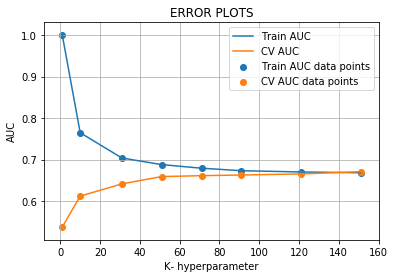

In [82]:
#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
#https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
#
K = [1, 10, 31, 51, 71, 91, 121, 151]
train_auc=[]
cv_auc=[]

for i in tqdm(K):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(bow_train,y_train)
    
    #for train error 
    y_train_scores = batch_predict( knn,bow_train)
    #for cv error
    y_cv_scores = batch_predict( knn,bow_cv)
    
    
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_scores))
    cv_auc.append(roc_auc_score(y_cv, y_cv_scores))

    
    ## from the error plot we choose K such that, we will have maximum AUC on cv data and gap between the train and cv is less
    
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC data points')
plt.scatter(K, cv_auc, label='CV AUC data points')

plt.legend()
plt.xlabel("K- hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()    
    

In [84]:
print(K)    
print(cv_auc)

[1, 10, 31, 51, 71, 91, 121, 151]
[0.5373035796427736, 0.6116451557364138, 0.6413077019823408, 0.6588511943917204, 0.6610443271866308, 0.6626504295470155, 0.6652133291537778, 0.6706709547231682]


### B. Train model using the best hyper-parameter value

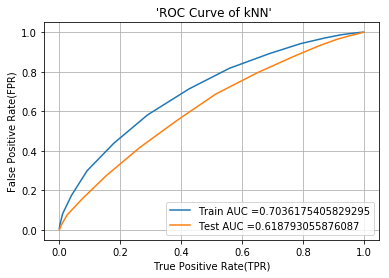

In [86]:
#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
#https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score





knn = KNeighborsClassifier(n_neighbors = 31)
knn.fit(bow_train,y_train)
    
#for train error 
y_train_scores = batch_predict( knn,bow_train)
#for cv error
y_test_scores = batch_predict( knn,bow_test)
    

train_fpr, train_tpr, train_threshold = roc_curve(y_train,y_train_scores)
roc_auc_train = auc(train_fpr, train_tpr)
    
test_fpr, test_tpr,test_threshold = roc_curve(y_test,y_test_scores)
roc_auc_test = auc(test_fpr, test_tpr)

    
    
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(roc_auc_train))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(roc_auc_test))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title(" 'ROC Curve of kNN'")
plt.grid()
plt.show()

### c) Confusion Matrix

#### Train Data

In [74]:
# we are writing our own function for predict, with defined threshold
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        #value Error-The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()
        #http://justinbois.github.io/bootcamp/2016/lessons/l19_numpy_arrays.html
        if (i>=t).any():
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [88]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24649339548514515 for threshold 0.742
[[ 1913  2427]
 [ 4334 19451]]


the maximum value of tpr*(1-fpr) 0.24649339548514515 for threshold 0.742


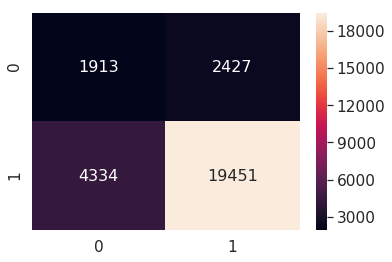

In [89]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

#### Test Data

In [90]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24980388380021004 for threshold 0.774
[[ 937  991]
 [3307 7265]]


the maximum value of tpr*(1-fpr) 0.24980388380021004 for threshold 0.774


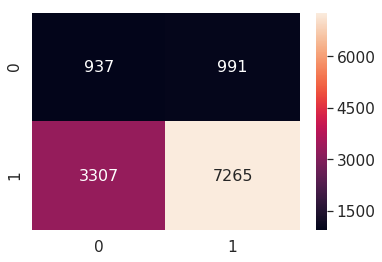

In [92]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

### Observations:-

1. I've applied Bag of Words (BOW) Feature Generation Technique to convert text to numeric vector.
2. I've used a simple for loop for  cross validation to find the optimal K and applied  and brute force algorithm.
3. The optimal K value and AUC for  brute force alogorithm.
  1.   Bag of Words (BOW) optimal K value is 31 & Test AUC is 0.61

## 2.5.2 Applying KNN brute force on TFIDF, SET 2

In [75]:
tfidf_train=hstack((price_standardized_train_data,previous_projects_standardized_train_data,categories_one_hot_train_data,sub_categories_one_hot_train_data,school_state_one_hot_train_data,project_grade_category_one_hot_train_data,teacher_prefix_one_hot_train_data,essay_tfidf_train,project_title_tfidf_train))
tfidf_train=tfidf_train.tocsr()

In [76]:
tfidf_cv=hstack((price_standardized_cv_data,previous_projects_standardized_cv_data,categories_one_hot_cv_data,sub_categories_one_hot_cv_data,school_state_one_hot_cv_data,project_grade_category_one_hot_cv_data,teacher_prefix_one_hot_cv_data,essay_tfidf_cv,project_title_tfidf_cv))

tfidf_cv=tfidf_cv.tocsr()

In [77]:
tfidf_test=hstack((price_standardized_test_data,previous_projects_standardized_test_data,categories_one_hot_test_data,sub_categories_one_hot_test_data,school_state_one_hot_test_data ,project_grade_category_one_hot_test_data,teacher_prefix_one_hot_test_data,essay_tfidf_test,project_title_tfidf_test))

tfidf_test=tfidf_test.tocsr()

In [79]:
print("Final Shape of the Data matrix")
print(tfidf_train.shape, y_train.shape)
print(tfidf_cv.shape, y_cv.shape)
print(tfidf_test.shape, y_test.shape)

Final Shape of the Data matrix
(28125, 12605) (28125,)
(9375, 12605) (9375,)
(12500, 12605) (12500,)


### A. Find the best hyper parameter which results in the maximum AUC value


100%|██████████| 8/8 [13:49<00:00, 104.08s/it]

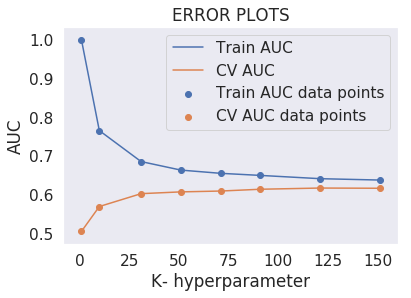

In [109]:
#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
#https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

K = [1, 10, 31, 51,71,91, 121,151]
train_auc=[]
cv_auc=[]

for i in tqdm(K):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(tfidf_train,y_train)
    
    #for train error 
    y_train_scores = batch_predict(knn,tfidf_train)
    #for cv error
    y_cv_scores = batch_predict(knn,tfidf_cv)
    
    
     # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_scores))
    cv_auc.append(roc_auc_score(y_cv,y_cv_scores))

    
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC data points')
plt.scatter(K, cv_auc, label='CV AUC data points')

plt.legend()
plt.xlabel("K- hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()    
    
    

In [110]:
print(K)    
print(cv_auc)

[1, 10, 31, 51, 71, 91, 121, 151]
[0.505230811418141, 0.5695443761167358, 0.6027393096441848, 0.6073315439393218, 0.6095040493368968, 0.6141310405784951, 0.6172244960329982, 0.6166499815879765]


In [ ]:
Best_K= 51

### B] Train model using the best hyper-parameter value

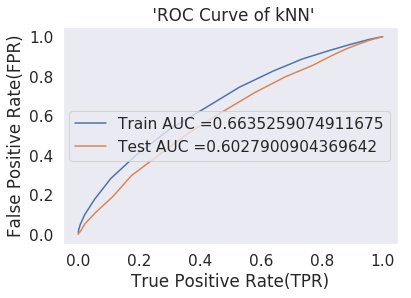

In [111]:
#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
#https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score





knn = KNeighborsClassifier(n_neighbors = 51)
knn.fit(tfidf_train,y_train)
    
#for train error 
y_train_scores = batch_predict( knn,tfidf_train)
#for cv error
y_test_scores = batch_predict( knn,tfidf_test)
    

train_fpr, train_tpr, train_threshold = roc_curve(y_train,y_train_scores)
roc_auc_train = auc(train_fpr, train_tpr)
    
test_fpr, test_tpr,test_threshold = roc_curve(y_test,y_test_scores)
roc_auc_test = auc(test_fpr, test_tpr)

    
    
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(roc_auc_train))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(roc_auc_test))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title(" 'ROC Curve of kNN'")
plt.grid()
plt.show()

### c) Confusion Matrix

#### Train Data

In [112]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24914369597995287 for threshold 0.824
[[ 2043  2297]
 [ 6073 17712]]


the maximum value of tpr*(1-fpr) 0.24914369597995287 for threshold 0.824


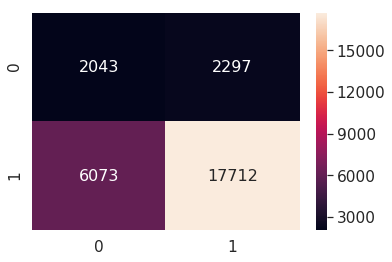

In [113]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

#### Test Data

In [114]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24930027676865069 for threshold 0.843
[[1015  913]
 [4016 6556]]


the maximum value of tpr*(1-fpr) 0.24930027676865069 for threshold 0.843


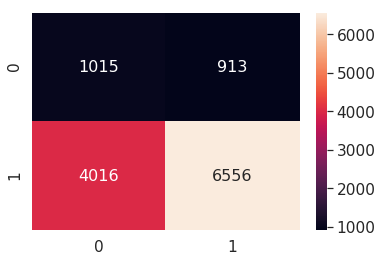

In [116]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

### Obseravtion

1. I've applied Term Frequency Inverse Document Frequency Feature Generation Technique to convert text to numeric vector.
2. I've used a simple for loop for  cross validation to find the optimal K and applied  and brute force algorithm.
3. The optimal K value and AUC for  brute force alogorithm.
  1.   Bag of Words (BOW) optimal K value is 51 & Test AUC is 0.60

##  2.5.3 Applying KNN brute force on AVG W2V

In [88]:
w2v_train=hstack((price_standardized_train_data,previous_projects_standardized_train_data,categories_one_hot_train_data,sub_categories_one_hot_train_data,school_state_one_hot_train_data,project_grade_category_one_hot_train_data,teacher_prefix_one_hot_train_data,sent_vectors_train,title_vectors_train))
w2v_train=w2v_train.tocsr()

In [91]:
w2v_cv=hstack((price_standardized_cv_data,previous_projects_standardized_cv_data,categories_one_hot_cv_data,sub_categories_one_hot_cv_data,school_state_one_hot_cv_data,project_grade_category_one_hot_cv_data,teacher_prefix_one_hot_cv_data,sent_vectors_cv,title_vectors_cv))
w2v_cv=w2v_cv.tocsr()

In [92]:
w2v_test=hstack((price_standardized_test_data,previous_projects_standardized_test_data,categories_one_hot_test_data,sub_categories_one_hot_test_data,school_state_one_hot_test_data ,project_grade_category_one_hot_test_data,teacher_prefix_one_hot_test_data,sent_vectors_test,title_vectors_test))
w2v_test=w2v_test.tocsr()

In [93]:
print("Final Shape of the Data matrix")
print(w2v_train.shape, y_train.shape)
print(w2v_cv.shape, y_cv.shape)
print(w2v_test.shape, y_test.shape)

Final Shape of the Data matrix
(28125, 201) (28125,)
(9375, 201) (9375,)
(12500, 201) (12500,)


### A. Find the best hyper parameter which results in the maximum AUC value

100%|██████████| 8/8 [42:51<00:00, 321.92s/it]


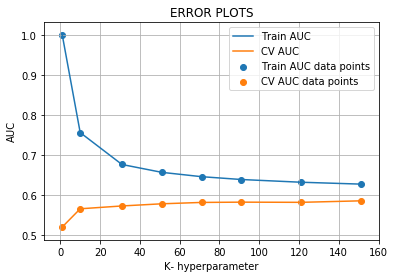

In [94]:
#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
#https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

K = [1,10,31, 51,71,91, 121,151]
train_auc=[]
cv_auc=[]

for i in tqdm(K):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(w2v_train,y_train)
    
    #for train error 
    y_train_scores = batch_predict( knn,w2v_train)
    #for cv error
    y_cv_scores = batch_predict( knn,w2v_cv)
    
    
     # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_scores))
    cv_auc.append(roc_auc_score(y_cv, y_cv_scores))

    
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC data points')
plt.scatter(K, cv_auc, label='CV AUC data points')

plt.legend()
plt.xlabel("K- hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()    
    

In [95]:
print(K)    
print(cv_auc)

[1, 10, 31, 51, 71, 91, 121, 151]
[0.5207918931973547, 0.5661755252834326, 0.5732764959136821, 0.5786564525725985, 0.5820838712592237, 0.5827752597525726, 0.5823283909566002, 0.5860637814825106]


### B] Train model using the best hyper-parameter value

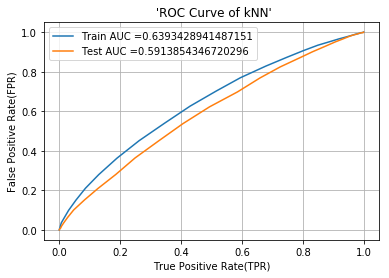

In [97]:
#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
#https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score





knn = KNeighborsClassifier(n_neighbors = 91)
knn.fit(w2v_train,y_train)
    
#for train error 
y_train_scores = batch_predict( knn,w2v_train)
#for cv error
y_test_scores = batch_predict( knn,w2v_test)
    

train_fpr, train_tpr, train_threshold = roc_curve(y_train,y_train_scores)
roc_auc_train = auc(train_fpr, train_tpr)
    
test_fpr, test_tpr,test_threshold = roc_curve(y_test,y_test_scores)
roc_auc_test = auc(test_fpr, test_tpr)

    
    
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(roc_auc_train))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(roc_auc_test))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title(" 'ROC Curve of kNN'")
plt.grid()
plt.show()

### C) Confusion Matrix

#### Train Data

In [98]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24975450742211558 for threshold 0.835
[[ 2102  2238]
 [ 7071 16714]]


the maximum value of tpr*(1-fpr) 0.24975450742211558 for threshold 0.835


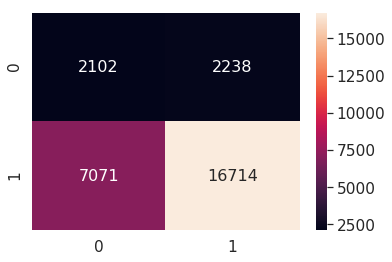

In [99]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

#### Test Data

In [102]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24996126099757235 for threshold 0.846
[[ 976  952]
 [3987 6585]]


the maximum value of tpr*(1-fpr) 0.24996126099757235 for threshold 0.846


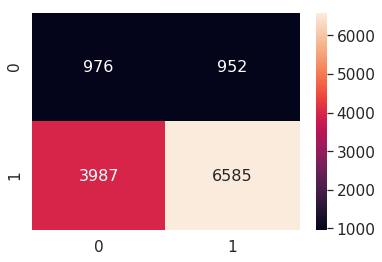

In [104]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

### Observations

1. I've first applied Word2Vec and computed the average w2v for each review and then coverted the text to numeric vector.
2. I've used a simple for loop for  cross validation to find the optimal K and applied  and brute force algorithm.
3. The optimal K value and AUC for  brute force alogorithm.
  1.   Bag of Words (BOW) optimal K value is 91 & Test AUC is 0.59

## 2.5.4  Applying KNN brute force on TFIDF W2V

In [89]:
tfidf_w2v_train=hstack((price_standardized_train_data,previous_projects_standardized_train_data,categories_one_hot_train_data,sub_categories_one_hot_train_data,school_state_one_hot_train_data,project_grade_category_one_hot_train_data,teacher_prefix_one_hot_train_data,tfidf_w2v_essay_train,tfidf_w2v_title_train))
tfidf_w2v_train=tfidf_w2v_train.tocsr()

In [90]:
tfidf_w2v_cv=hstack((price_standardized_cv_data,previous_projects_standardized_cv_data,categories_one_hot_cv_data,sub_categories_one_hot_cv_data,school_state_one_hot_cv_data,project_grade_category_one_hot_cv_data,teacher_prefix_one_hot_cv_data,tfidf_w2v_essay_cv,tfidf_w2v_title_cv))
tfidf_w2v_cv=tfidf_w2v_cv.tocsr()

In [91]:
tfidf_w2v_test=hstack((price_standardized_test_data,previous_projects_standardized_test_data,categories_one_hot_test_data,sub_categories_one_hot_test_data,school_state_one_hot_test_data ,project_grade_category_one_hot_test_data,teacher_prefix_one_hot_test_data,tfidf_w2v_essay_test,tfidf_w2v_title_test))
tfidf_w2v_test=tfidf_w2v_test.tocsr()

In [92]:
print("Final Shape of the Data matrix")
print(tfidf_w2v_train.shape, y_train.shape)
print(tfidf_w2v_cv.shape, y_cv.shape)
print(tfidf_w2v_test.shape, y_test.shape)

Final Shape of the Data matrix
(28125, 701) (28125,)
(9375, 701) (9375,)
(12500, 701) (12500,)


### A. Find the best hyper parameter which results in the maximum AUC value

100%|██████████| 8/8 [4:16:21<00:00, 1920.57s/it]  


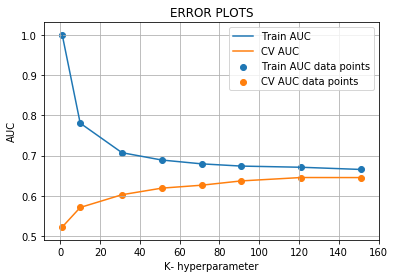

In [93]:
#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
#https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

K = [1,10,31, 51,71,91, 121,151]
train_auc=[]
cv_auc=[]

for i in tqdm(K):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(tfidf_w2v_train,y_train)
    
    #for train error 
    y_train_scores = batch_predict( knn,tfidf_w2v_train)
    #for cv error
    y_cv_scores = batch_predict( knn,tfidf_w2v_cv)
    
    
     # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_scores))
    cv_auc.append(roc_auc_score(y_cv, y_cv_scores))

    
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC data points')
plt.scatter(K, cv_auc, label='CV AUC data points')

plt.legend()
plt.xlabel("K- hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()    
    

In [94]:
print(K)    
print(cv_auc)

[1, 10, 31, 51, 71, 91, 121, 151]
[0.5223558249589589, 0.5708832381158718, 0.6026195573543692, 0.6190105757058625, 0.6263136773861102, 0.6370425841933606, 0.645460568353264, 0.64534618005895]


### B] Train model using the best hyper-parameter value

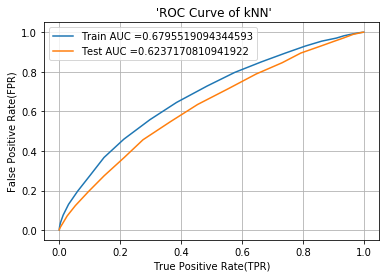

In [96]:
#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
#https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score





knn = KNeighborsClassifier(n_neighbors = 71)
knn.fit(tfidf_w2v_train,y_train)
    
#for train error 
y_train_scores = batch_predict( knn,tfidf_w2v_train)
#for cv error
y_test_scores = batch_predict( knn,tfidf_w2v_test)
    

train_fpr, train_tpr, train_threshold = roc_curve(y_train,y_train_scores)
roc_auc_train = auc(train_fpr, train_tpr)
    
test_fpr, test_tpr,test_threshold = roc_curve(y_test,y_test_scores)
roc_auc_test = auc(test_fpr, test_tpr)

    
    
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(roc_auc_train))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(roc_auc_test))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title(" 'ROC Curve of kNN'")
plt.grid()
plt.show()

### D) Confusion Matrix

#### Train Data

In [97]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2497959183673469 for threshold 0.831
[[ 2232  2108]
 [ 6462 17323]]


the maximum value of tpr*(1-fpr) 0.2497959183673469 for threshold 0.831


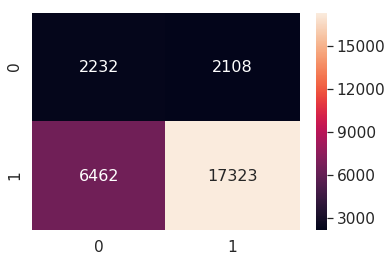

In [98]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

#### Test Data

In [99]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_scores,train_threshold  , test_fpr,test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2479167025361134 for threshold 0.845
[[1052  876]
 [3858 6714]]


the maximum value of tpr*(1-fpr) 0.2479167025361134 for threshold 0.845


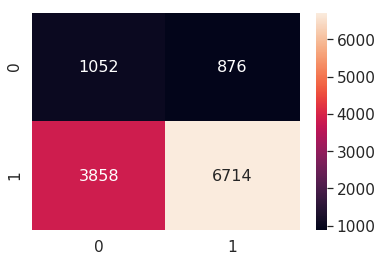

In [101]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

### Observations

1. I've applied TF-IDF Word2Vec Feature Generation Technique to convert text to numeric vector.
2. I've used a simple for loop for  cross validation to find the optimal K and applied  and brute force algorithm.
3. The optimal K value and AUC for  brute force alogorithm.
  1.   Bag of Words (BOW) optimal K value is 71 & Test AUC is 0.62

## Task-2

## 2.5 Feature selection with SelectKBest

In [88]:
from sklearn.feature_selection import SelectKBest, chi2



In [91]:



train_new = SelectKBest(chi2, k=2000).fit_transform(abs(tfidf_train), y_train)
cv_new = SelectKBest(chi2, k=2000).fit(abs(tfidf_train), y_train).transform(abs(tfidf_cv))
test_new = SelectKBest(chi2, k=2000).fit(abs(tfidf_train), y_train).transform(abs(tfidf_test))

In [92]:
print(" Data matrix")
print(train_new.shape, y_train.shape)
print(cv_new.shape, y_cv.shape)
print(test_new.shape, y_test.shape)

 Data matrix
(28125, 2000) (28125,)
(9375, 2000) (9375,)
(12500, 2000) (12500,)


### A. Find the best hyper parameter which results in the maximum AUC value

100%|██████████| 8/8 [10:38<00:00, 80.50s/it]


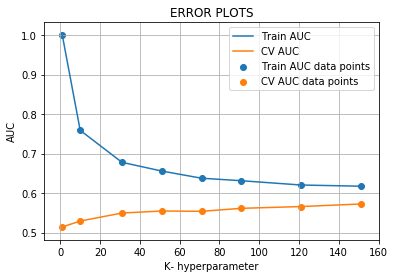

In [93]:
#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
#https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

K = [1,10,31, 51,71,91, 121,151]
train_auc=[]
cv_auc=[]

for i in tqdm(K):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_new,y_train)
    
    #for train error 
    y_train_scores = batch_predict( knn,train_new)
    #for cv error
    y_cv_scores = batch_predict( knn,cv_new)
    
    
     # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_scores))
    cv_auc.append(roc_auc_score(y_cv, y_cv_scores))

    
    
plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC data points')
plt.scatter(K, cv_auc, label='CV AUC data points')

plt.legend()
plt.xlabel("K- hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show() 
    

In [122]:
print(K)    
print(cv_auc)

[1, 10, 31, 51, 71, 91, 121, 151]
[0.5000413420141097, 0.5022891613973043, 0.5211502778724107, 0.5311068565468743, 0.5383513467640804, 0.5537093380794663, 0.5587208798278358, 0.5528995491976072]


### B. Train model using the best hyper-parameter value

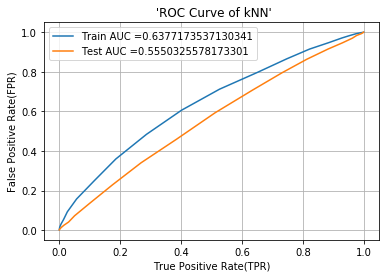

In [94]:
#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci
#https://stackoverflow.com/questions/31159157/different-result-with-roc-auc-score-and-auc
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score





knn = KNeighborsClassifier(n_neighbors = 71)
knn.fit(train_new,y_train)
    
#for train error 
y_train_scores = batch_predict( knn,train_new)
#for cv error
y_test_scores = batch_predict( knn,test_new )
    

train_fpr, train_tpr, train_threshold = roc_curve(y_train,y_train_scores)
roc_auc_train = auc(train_fpr, train_tpr)
    
test_fpr, test_tpr,test_threshold = roc_curve(y_test,y_test_scores)
roc_auc_test = auc(test_fpr, test_tpr)

    
    
plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(roc_auc_train))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(roc_auc_test))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title(" 'ROC Curve of kNN'")
plt.grid()
plt.show()

#### Observations:

The performance of this model is poor, it behaves similar to a random model

### C) Confusion Matrix

#### Train Data

In [95]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24929787211450657 for threshold 0.831
[[ 2055  2285]
 [ 6841 16944]]


the maximum value of tpr*(1-fpr) 0.24929787211450657 for threshold 0.831


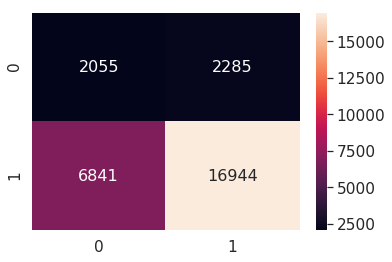

In [96]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_train, predict(y_train_scores,  train_threshold, train_fpr,train_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

#### Test Data

In [97]:
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_scores, train_threshold, test_fpr,test_tpr)))

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24985768797024846 for threshold 0.845
[[ 941  987]
 [4300 6272]]


the maximum value of tpr*(1-fpr) 0.24985768797024846 for threshold 0.845


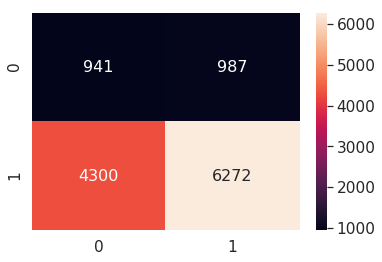

In [98]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

df_cm = pd.DataFrame(confusion_matrix(y_test, predict(y_test_scores,  train_threshold, test_fpr,test_tpr)))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

## Conclusion

In [99]:
# Compare all your models using Prettytable library

# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter= K value", "Test AUC"]

x.add_row(["BOW", "Knn ", 31, 0.61])
x.add_row(["TFIDF", "Knn ", 51, 0.60])
x.add_row(["AVG W2V", "Knn ", 91, 0.59])
x.add_row(["TFIDF W2V", "Knn ", 71, 0.62])
x.add_row(["TFIDF 2000", "Knn ", 91, 0.55])

print(x)

+------------+-------+--------------------------+----------+
| Vectorizer | Model | Hyper Parameter= K value | Test AUC |
+------------+-------+--------------------------+----------+
|    BOW     |  Knn  |            31            |   0.61   |
|   TFIDF    |  Knn  |            51            |   0.6    |
|  AVG W2V   |  Knn  |            91            |   0.59   |
| TFIDF W2V  |  Knn  |            71            |   0.62   |
| TFIDF 2000 |  Knn  |            91            |   0.55   |
+------------+-------+--------------------------+----------+


### Conclusions

The result of feature generation techniques and machine learning algorithms vary by application. But by comparing the accuracy of all 4 developed models,It looks like Knn model in which we used TFIDF W2v to vectorize test data performed better than any other model in which we used a different vectorizer  to vectorize text data.
Also when we did feature selection we got really bad result.